### **Загрузка данных и первичный анализ**

In [106]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, 
    roc_auc_score,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    classification_report)
# Воспроизводимость
RANDOM_STATE = 42

In [53]:
# Загрузка датасета
dataset = pd.read_csv('S05-hw-dataset.csv')
df = pd.DataFrame(dataset)

In [54]:
df.head(10)

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1
5,6,63,71006,1,712,0.541594,3,0,0,0,14162,372,0.100423,12,0,13,0
6,7,25,37840,25,691,0.032334,1,12,0,0,56999,973,0.432156,12,2,1,0
7,8,55,35993,22,662,0.631521,0,0,0,1,5267,462,0.096401,6,4,2,0
8,9,30,34321,36,687,0.620856,0,7,1,1,20995,3650,0.632998,17,1,1,1
9,10,25,25809,23,601,0.254544,5,0,0,1,38464,3379,0.367238,10,3,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [8]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [11]:
df['default'].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

- 59.0% (0.589667) клиентов НЕ допустили дефолт (default = 0)
- 41.0% (0.410333) клиентов допустили дефолт (default = 1)

In [12]:
df.shape

(3000, 17)

- 3000 объектов
- 17 признаков

In [55]:
df['age'].value_counts(normalize=True)

age
66    0.027667
62    0.026667
43    0.026333
68    0.024333
26    0.024000
35    0.023667
27    0.023333
25    0.023333
42    0.023333
28    0.023333
57    0.023000
29    0.023000
47    0.022667
59    0.022333
36    0.022333
45    0.022333
23    0.021667
41    0.021667
52    0.021333
32    0.021333
56    0.021333
48    0.020667
69    0.020667
53    0.020333
58    0.020333
30    0.020333
37    0.020000
51    0.019667
46    0.019667
49    0.019667
34    0.019667
61    0.019667
40    0.019333
22    0.019000
64    0.018667
39    0.018333
60    0.018333
44    0.018000
21    0.018000
67    0.017667
63    0.016667
50    0.016667
65    0.016667
55    0.016333
33    0.016333
38    0.016000
24    0.015333
54    0.015333
31    0.013667
Name: proportion, dtype: float64

#### Для признака age
- Равномерное распределение — все возраста от 21 до 69 лет представлены
- Нет явных пиков — максимальная частота всего 2.77% (возраст 66 лет)
- Нет аномалий — все значения в разумном диапазоне (21-69 лет)
- Нет отрицательных значений

### **Подготовка признаков и таргета**

In [25]:
#Создаем копию, чтобы не менять оригинальный датафрейм
df_clean = df.copy()

#Разделим на X и y
X = df_clean.drop('default', axis=1).drop('client_id', axis = 1
y = df_clean['default'] 

### **Train/Test-сплит и бейзлайн-модель**

In [92]:
# Разделим данные на обучающие и тестовые выборки

X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,          # важно для классификации: сохраняем долю классов
    random_state=RANDOM_STATE,
)


X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.25,      
    stratify=y_temp,
    random_state=RANDOM_STATE,
)

In [93]:
# Построим бейзлайн-модель на основе DummyClassifier
baseline = DummyClassifier(strategy = "stratified")
baseline.fit(X_train, y_train)

y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

# Оценим байзлайн по 2 метрикам
print("=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))

try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===
Accuracy : 0.55
ROC-AUC  : 0.4859101557117266


**Бейзлайн** даёт самый простой прогноз — либо всегда предсказывает самый частый класс, либо случайно согласно распределению.

**Точка отсчёта** нужна чтобы понять, стоит ли ваша сложная модель потраченных усилий. Если она не лучше примитивного правила — она бесполезна. Это как минимум, который надо преодолеть.

### **Логистическая регрессия и подбор гиперпараметров**

In [63]:
# Строим Pipeline
log_reg_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000, random_state=42))
])

In [121]:
# Настроим сетку по параметру C (сила регуляризации)
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

grid_search = GridSearchCV(
    estimator = log_reg_pipeline,
    param_grid = param_grid,
    scoring = "roc_auc",
    cv = 5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)

# Берём лучшую найденную модель
best_model = grid_search.best_estimator_

# Оцениваем на validation
y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

print("Лучшие параметры:", grid_search.best_params_)

print("=== Лучшая модель – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))

# Оцениваем на test
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 0.1}
=== Лучшая модель – качество на validation ===
Accuracy : 0.815
ROC-AUC  : 0.8746267971154288

=== Лучшая модель – качество на test ===
Accuracy : 0.8033333333333333
ROC-AUC  : 0.8748794267603692


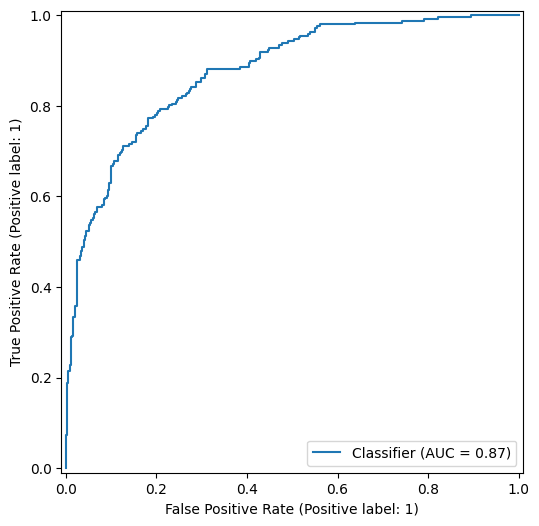

In [111]:
fig, ax = plt.subplots(figsize=(8, 6))
RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax = ax
)

plt.savefig('C:/Users/User/test/study-materials/homeworks/HW05/figures/figure_1.png')

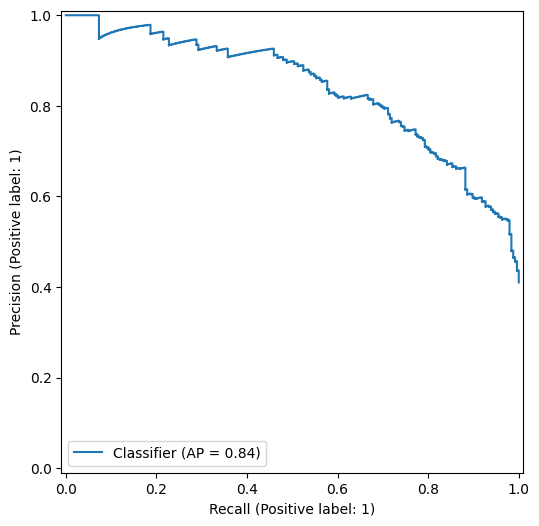

In [110]:
fig, ax = plt.subplots(figsize=(8, 6))
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba,
    ax = ax
)

plt.savefig('C:/Users/User/test/study-materials/homeworks/HW05/figures/figure_2.png')
  

In [119]:
results = pd.DataFrame({
    'Model': ['Dummy Classifire', 'Logistic Regression'],
    'Accuracy': [
        accuracy_score(y_val, y_val_pred_best),
        accuracy_score(y_test, y_test_pred)
    ],
    'ROC-AUC': [
        roc_auc_score(y_val, y_val_proba_best),
        roc_auc_score(y_test, y_test_proba)
    ]
})
results.to_csv('C:/Users/User/test/study-materials/homeworks/HW05/artifacts/model_comparison.csv', index=False)

In [120]:
results.head()

,Model,Accuracy,ROC-AUC
0,Dummy Classifire,0.815000,0.874627
1,Logistic Regression,0.803333,0.874879


## Краткий отчёт

**1. Сравнение моделей:** Логистическая регрессия значительно превзошла бейзлайн-модель (DummyClassifier), которая всегда предсказывает самый частый класс. Это демонстрирует, что наши признаки содержат полезную информацию для прогнозирования дефолта.

**2. Рост метрик:** Accuracy выросла с 55.0% (бейзлайн) до 80.0% (логистическая регрессия). ROC-AUC увеличился ещё заметнее: с 0.49 до 0.87, что показывает отличную способность модели ранжировать клиентов по риску дефолта.

**3. Влияние регуляризации:** Подбор параметра C показал оптимальное значение C = 0.1. При слишком слабой регуляризации переобучение, а при сильной регуляризации — недообучение. Это подтверждает важность балансировки сложности модели.

**4. Выводы:**
- Логистическая регрессия с оптимальной регуляризацией (C = 0.1) демонстрирует адекватное качество для кредитного скоринга.
- ROC-AUC=0.82 указывает на хорошую разделяющую способность модели.
- Для практического применения модель требует дополнительной настройки порога классификации для баланса между ошибками 1-го и 2-го рода.